<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




*by TV Aditya*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

In [49]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", parse_dates=True)


## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

...

...

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
    * `df.head()`
* *Qual o tamanho do seu DataFrame*
    * `df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


In [50]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [51]:
df_columns_description = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv")
df_columns_description.to_html("Table_columns.html")

Abaixo a descricao de cada feature do nosso dataset

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>column</th>
      <th>source</th>
      <th>category</th>
      <th>description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>iso_code</td>
      <td>International Organization for Standardization</td>
      <td>Others</td>
      <td>ISO 3166-1 alpha-3 – three-letter country codes</td>
    </tr>
    <tr>
      <th>1</th>
      <td>continent</td>
      <td>Our World in Data</td>
      <td>Others</td>
      <td>Continent of the geographical location</td>
    </tr>
    <tr>
      <th>2</th>
      <td>location</td>
      <td>Our World in Data</td>
      <td>Others</td>
      <td>Geographical location</td>
    </tr>
    <tr>
      <th>3</th>
      <td>date</td>
      <td>Our World in Data</td>
      <td>Others</td>
      <td>Date of observation</td>
    </tr>
    <tr>
      <th>4</th>
      <td>total_cases</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>Total confirmed cases of COVID-19</td>
    </tr>
    <tr>
      <th>5</th>
      <td>new_cases</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>New confirmed cases of COVID-19</td>
    </tr>
    <tr>
      <th>6</th>
      <td>new_cases_smoothed</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>New confirmed cases of COVID-19 (7-day smoothed)</td>
    </tr>
    <tr>
      <th>7</th>
      <td>total_deaths</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>Total deaths attributed to COVID-19</td>
    </tr>
    <tr>
      <th>8</th>
      <td>new_deaths</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>New deaths attributed to COVID-19</td>
    </tr>
    <tr>
      <th>9</th>
      <td>new_deaths_smoothed</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>New deaths attributed to COVID-19 (7-day smoothed)</td>
    </tr>
    <tr>
      <th>10</th>
      <td>total_cases_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>Total confirmed cases of COVID-19 per 1,000,000 people</td>
    </tr>
    <tr>
      <th>11</th>
      <td>new_cases_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>New confirmed cases of COVID-19 per 1,000,000 people</td>
    </tr>
    <tr>
      <th>12</th>
      <td>new_cases_smoothed_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed cases</td>
      <td>New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people</td>
    </tr>
    <tr>
      <th>13</th>
      <td>total_deaths_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>Total deaths attributed to COVID-19 per 1,000,000 people</td>
    </tr>
    <tr>
      <th>14</th>
      <td>new_deaths_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>New deaths attributed to COVID-19 per 1,000,000 people</td>
    </tr>
    <tr>
      <th>15</th>
      <td>new_deaths_smoothed_per_million</td>
      <td>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</td>
      <td>Confirmed deaths</td>
      <td>New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people</td>
    </tr>
    <tr>
      <th>16</th>
      <td>reproduction_rate</td>
      <td>Arroyo Marioli et al. (2020). https://doi.org/10.2139/ssrn.3581633</td>
      <td>Reproduction rate</td>
      <td>Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database</td>
    </tr>
    <tr>
      <th>17</th>
      <td>icu_patients</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients in intensive care units (ICUs) on a given day</td>
    </tr>
    <tr>
      <th>18</th>
      <td>icu_patients_per_million</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people</td>
    </tr>
    <tr>
      <th>19</th>
      <td>hosp_patients</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients in hospital on a given day</td>
    </tr>
    <tr>
      <th>20</th>
      <td>hosp_patients_per_million</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients in hospital on a given day per 1,000,000 people</td>
    </tr>
    <tr>
      <th>21</th>
      <td>weekly_icu_admissions</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week</td>
    </tr>
    <tr>
      <th>22</th>
      <td>weekly_icu_admissions_per_million</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people</td>
    </tr>
    <tr>
      <th>23</th>
      <td>weekly_hosp_admissions</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients newly admitted to hospitals in a given week</td>
    </tr>
    <tr>
      <th>24</th>
      <td>weekly_hosp_admissions_per_million</td>
      <td>European CDC for EU countries, government sources for other countries</td>
      <td>Hospital &amp; ICU</td>
      <td>Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people</td>
    </tr>
    <tr>
      <th>25</th>
      <td>total_tests</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>Total tests for COVID-19</td>
    </tr>
    <tr>
      <th>26</th>
      <td>new_tests</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>New tests for COVID-19 (only calculated for consecutive days)</td>
    </tr>
    <tr>
      <th>27</th>
      <td>total_tests_per_thousand</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>Total tests for COVID-19 per 1,000 people</td>
    </tr>
    <tr>
      <th>28</th>
      <td>new_tests_per_thousand</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>New tests for COVID-19 per 1,000 people</td>
    </tr>
    <tr>
      <th>29</th>
      <td>new_tests_smoothed</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window</td>
    </tr>
    <tr>
      <th>30</th>
      <td>new_tests_smoothed_per_thousand</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>New tests for COVID-19 (7-day smoothed) per 1,000 people</td>
    </tr>
    <tr>
      <th>31</th>
      <td>positive_rate</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)</td>
    </tr>
    <tr>
      <th>32</th>
      <td>tests_per_case</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate)</td>
    </tr>
    <tr>
      <th>33</th>
      <td>tests_units</td>
      <td>National government reports</td>
      <td>Tests &amp; positivity</td>
      <td>Units used by the location to report its testing data</td>
    </tr>
    <tr>
      <th>34</th>
      <td>total_vaccinations</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of COVID-19 vaccination doses administered</td>
    </tr>
    <tr>
      <th>35</th>
      <td>people_vaccinated</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of people who received at least one vaccine dose</td>
    </tr>
    <tr>
      <th>36</th>
      <td>people_fully_vaccinated</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of people who received all doses prescribed by the vaccination protocol</td>
    </tr>
    <tr>
      <th>37</th>
      <td>total_boosters</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)</td>
    </tr>
    <tr>
      <th>38</th>
      <td>new_vaccinations</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>New COVID-19 vaccination doses administered (only calculated for consecutive days)</td>
    </tr>
    <tr>
      <th>39</th>
      <td>new_vaccinations_smoothed</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window</td>
    </tr>
    <tr>
      <th>40</th>
      <td>total_vaccinations_per_hundred</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of COVID-19 vaccination doses administered per 100 people in the total population</td>
    </tr>
    <tr>
      <th>41</th>
      <td>people_vaccinated_per_hundred</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of people who received at least one vaccine dose per 100 people in the total population</td>
    </tr>
    <tr>
      <th>42</th>
      <td>people_fully_vaccinated_per_hundred</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of people who received all doses prescribed by the vaccination protocol per 100 people in the total population</td>
    </tr>
    <tr>
      <th>43</th>
      <td>total_boosters_per_hundred</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>Total number of COVID-19 vaccination booster doses administered per 100 people in the total population</td>
    </tr>
    <tr>
      <th>44</th>
      <td>new_vaccinations_smoothed_per_million</td>
      <td>National government reports</td>
      <td>Vaccinations</td>
      <td>New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population</td>
    </tr>
    <tr>
      <th>45</th>
      <td>stringency_index</td>
      <td>Oxford COVID-19 Government Response Tracker, Blavatnik School of Government</td>
      <td>Policy responses</td>
      <td>Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)</td>
    </tr>
    <tr>
      <th>46</th>
      <td>population</td>
      <td>United Nations, Department of Economic and Social Affairs, Population Division, World Population Prospects 2019 Revision</td>
      <td>Others</td>
      <td>Population in 2020</td>
    </tr>
    <tr>
      <th>47</th>
      <td>population_density</td>
      <td>World Bank World Development Indicators, sourced from Food and Agriculture Organization and World Bank estimates</td>
      <td>Others</td>
      <td>Number of people divided by land area, measured in square kilometers, most recent year available</td>
    </tr>
    <tr>
      <th>48</th>
      <td>median_age</td>
      <td>UN Population Division, World Population Prospects, 2017 Revision</td>
      <td>Others</td>
      <td>Median age of the population, UN projection for 2020</td>
    </tr>
    <tr>
      <th>49</th>
      <td>aged_65_older</td>
      <td>World Bank World Development Indicators based on age/sex distributions of United Nations World Population Prospects 2017 Revision</td>
      <td>Others</td>
      <td>Share of the population that is 65 years and older, most recent year available</td>
    </tr>
    <tr>
      <th>50</th>
      <td>aged_70_older</td>
      <td>United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects 2017 Revision</td>
      <td>Others</td>
      <td>Share of the population that is 70 years and older in 2015</td>
    </tr>
    <tr>
      <th>51</th>
      <td>gdp_per_capita</td>
      <td>World Bank World Development Indicators, source from World Bank, International Comparison Program database</td>
      <td>Others</td>
      <td>Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available</td>
    </tr>
    <tr>
      <th>52</th>
      <td>extreme_poverty</td>
      <td>World Bank World Development Indicators, sourced from World Bank Development Research Group</td>
      <td>Others</td>
      <td>Share of the population living in extreme poverty, most recent year available since 2010</td>
    </tr>
    <tr>
      <th>53</th>
      <td>cardiovasc_death_rate</td>
      <td>Global Burden of Disease Collaborative Network, Global Burden of Disease Study 2017 Results</td>
      <td>Others</td>
      <td>Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)</td>
    </tr>
    <tr>
      <th>54</th>
      <td>diabetes_prevalence</td>
      <td>World Bank World Development Indicators, sourced from International Diabetes Federation, Diabetes Atlas</td>
      <td>Others</td>
      <td>Diabetes prevalence (% of population aged 20 to 79) in 2017</td>
    </tr>
    <tr>
      <th>55</th>
      <td>female_smokers</td>
      <td>World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository</td>
      <td>Others</td>
      <td>Share of women who smoke, most recent year available</td>
    </tr>
    <tr>
      <th>56</th>
      <td>male_smokers</td>
      <td>World Bank World Development Indicators, sourced from World Health Organization, Global Health Observatory Data Repository</td>
      <td>Others</td>
      <td>Share of men who smoke, most recent year available</td>
    </tr>
    <tr>
      <th>57</th>
      <td>handwashing_facilities</td>
      <td>United Nations Statistics Division</td>
      <td>Others</td>
      <td>Share of the population with basic handwashing facilities on premises, most recent year available</td>
    </tr>
    <tr>
      <th>58</th>
      <td>hospital_beds_per_thousand</td>
      <td>OECD, Eurostat, World Bank, national government records and other sources</td>
      <td>Others</td>
      <td>Hospital beds per 1,000 people, most recent year available since 2010</td>
    </tr>
    <tr>
      <th>59</th>
      <td>life_expectancy</td>
      <td>James C. Riley, Clio Infra, United Nations Population Division</td>
      <td>Others</td>
      <td>Life expectancy at birth in 2019</td>
    </tr>
    <tr>
      <th>60</th>
      <td>human_development_index</td>
      <td>United Nations Development Programme (UNDP)</td>
      <td>Others</td>
      <td>A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506</td>
    </tr>
    <tr>
      <th>61</th>
      <td>excess_mortality</td>
      <td>Human Mortality Database (HMD) Short-term Mortality Fluctuations project and World Mortality Dataset (WMD)</td>
      <td>Others</td>
      <td>Excess mortality P-scores for all ages; see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality for the definition of the P-score and how we calculate it</td>
    </tr>
  </tbody>
</table>

In [52]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [53]:
df.shape

(111101, 62)

In [54]:
df.date =pd.to_datetime(df.date, format="%Y-%m-%d")

In [55]:
df.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
                                   ...      
handwashing_facilities               float64
hospital_beds_per_thousand           float64
life_expectancy                      float64
human_development_index              float64
excess_mortality                     float64
Length: 62, dtype: object

In [56]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.062320e+05,106229.000000,105219.000000,9.574200e+04,95897.000000,105219.000000,105670.000000,105667.000000,104662.000000,95193.000000,95348.000000,104662.000000,89442.000000,12099.000000,12099.000000,14480.000000,14480.000000,1052.000000,1052.000000,1936.000000,1936.000000,4.876300e+04,4.849000e+04,48490.000000,48763.000000,5.735700e+04,57357.000000,53651.000000,53035.000000,2.252300e+04,2.157600e+04,1.859200e+04,2.950000e+02,1.868700e+04,3.979300e+04,22523.000000,21576.000000,18592.000000,295.000000,39793.000000,92227.000000,1.103250e+05,102949.000000,98678.000000,97576.000000,98135.000000,99106.000000,66675.000000,99009.000000,101784.000000,77330.000000,76202.000000,49743.000000,90062.000000,105398.000000,99100.000000,3918.000000
mean,1.259825e+06,6296.901976,6296.672048,3.289908e+04,145.940071,132.119563,15598.289678,79.320118,79.255159,335.062212,1.535722,1.390803,1.010020,952.849574,23.612471,4233.575345,153.574324,238.492453,18.291132,3082.319685,94.532667,5.097814e+04,9.182573e+06,384.475184,2.301867,4.814541e+04,2.205029,0.087959,160.915186,5.081963e+07,2.695080e+07,1.616015e+07,2.636961e+06,7.899485e+05,3.770622e+05,35.107640,21.745957,15.439245,1.778407,3498.123615,57.633457,1.228980e+08,392.513736,30.538862,8.774122,5.553017,19277.203604,13.455436,258.931410,7.966455,10.580546,32.721052,50.777926,3.024719,73.251621,0.726843,18.142889
std,8.507350e+06,38739.439963,38262.688123,1.963241e+05,796.881417,742.770100,27485.209275,203.566908,159.919946,585.114857,3.930315,2.988775,0.351544,2764.433633,25.970387,11411.216053,200.771790,529.277075,33.368716,10145.469079,195.930763,1.839156e+05,3.944614e+07,919.762237,6.319842,1.656391e+05,5.413164,0.096958,875.694645,2.830051e+08,1.501763e+08,8.685864e+07,2.829325e+06,3.679087e+06,2.486359e+06,39.607004,22.245079,18.621932,3.084237,4557.097833,20.858575,6.747470e+08,1828.492968,9.127613,6.200933,4.229314,20037.946662,19.978258,119.212882,4.200813,10.486181,13.497135,31.755761,2.455397,7.552275,0.150293,35.303491
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.901036e+06,0.000000e+00,0.000000,-53.318000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.628000e+03,2.000000,8.286000,6.100000e+01,0.000000,0.000000,303.878750,0.248000,1.452000,9.331000,0.000000,0.000000,0.840000,29.000000,3.796000,104.750000,20.146000,6.860000,1.589000,38.471000,8.565000,1.866

In [57]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20) 

total_boosters                           0.997345
total_boosters_per_hundred               0.997345
weekly_icu_admissions_per_million        0.990531
weekly_icu_admissions                    0.990531
weekly_hosp_admissions_per_million       0.982574
weekly_hosp_admissions                   0.982574
excess_mortality                         0.964735
icu_patients_per_million                 0.891099
icu_patients                             0.891099
hosp_patients_per_million                0.869668
hosp_patients                            0.869668
people_fully_vaccinated                  0.832657
people_fully_vaccinated_per_hundred      0.832657
new_vaccinations                         0.831802
people_vaccinated                        0.805798
people_vaccinated_per_hundred            0.805798
total_vaccinations_per_hundred           0.797275
total_vaccinations                       0.797275
new_vaccinations_smoothed_per_million    0.641830
new_vaccinations_smoothed                0.641830


In [58]:
print(df.date.max())
print(df.date.min())

2021-08-21 00:00:00
2020-01-01 00:00:00


In [59]:
df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False)].sort_values(by="total_cases", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
105854,USA,North America,United States,2021-08-15,36678753.0,38482.0,130709.714,621425.0,170.0,648.571,110811.056,116.259,394.890,1877.402,0.514,1.959,1.25,21047.0,63.586,81528.0,246.306,NaN,NaN,80450.0,243.049,383611.0,506779805.0,1531.045,1.159,988748.0,2.987,0.132,7.6,tests performed,356433665.0,198088722.0,168362058.0,NaN,664840.0,718962.0,106.58,59.23,50.34,NaN,2150.0,56.02,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
46446,IND,Asia,India,2021-08-15,32225513.0,32937.0,36508.429,431642.0,417.0,476.143,23351.747,23.867,26.455,312.783,0.302,0.345,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923863.0,493624440.0,357.698,1.394,1940751.0,1.406,0.019,53.2,samples tested,NaN,NaN,NaN,NaN,NaN,5502629.0,NaN,NaN,NaN,NaN,3987.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
14620,BRA,South America,Brazil,2021-08-15,20364099.0,13957.0,28346.714,569058.0,270.0,843.857,95804.270,65.662,133.359,2677.172,1.270,3.970,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164638573.0,119793423.0,49629214.0,NaN,1185971.0,1664219.0,77.46,56.36,23.35,NaN,7829.0,51.39,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
36456,FRA,Europe,France,2021-08-15,6543099.0,21172.0,24535.714,112873.0,44.0,66.571,96842.619,313.361,363.146,1670.602,0.651,0.985,1.11,1852.0,27.411,9798.0,145.018,1121.049,16.592,4817.4,71.301,197120.0,NaN,NaN,2.918,777001.0,11.500,0.034,29.4,people tested,80847265.0,46277151.0,35526183.0,NaN,86665.0,443726.0,119.66,68.49,52.58,NaN,6567.0,NaN,6.756425e+07,122.578,42.0,19.718,13.079,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN
83027,RUS,Europe,Russia,2021-08-15,6511431.0,21010.0,21255.714,167595.0,800.0,783.714,44618.872,143.969,145.652,1148.426,5.482,5.370,0.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,441676.0,3.027,0.048,20.8,tests performed,73164150.0,40731280.0,32432870.0,NaN,268500.0,988375.0,50.13,27.91,22.22,NaN,6773.0,NaN,1.459345e+08,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN


In [60]:
df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False)].sort_values(by="total_deaths", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
105854,USA,North America,United States,2021-08-15,36678753.0,38482.0,130709.714,621425.0,170.0,648.571,110811.056,116.259,394.890,1877.402,0.514,1.959,1.25,21047.0,63.586,81528.0,246.306,NaN,NaN,80450.0,243.049,383611.0,506779805.0,1531.045,1.159,988748.0,2.987,0.132,7.6,tests performed,356433665.0,198088722.0,168362058.0,NaN,664840.0,718962.0,106.58,59.23,50.34,NaN,2150.0,56.02,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
14620,BRA,South America,Brazil,2021-08-15,20364099.0,13957.0,28346.714,569058.0,270.0,843.857,95804.270,65.662,133.359,2677.172,1.270,3.970,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164638573.0,119793423.0,49629214.0,NaN,1185971.0,1664219.0,77.46,56.36,23.35,NaN,7829.0,51.39,2.125594e+08,25.040,33.5,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
46446,IND,Asia,India,2021-08-15,32225513.0,32937.0,36508.429,431642.0,417.0,476.143,23351.747,23.867,26.455,312.783,0.302,0.345,0.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1923863.0,493624440.0,357.698,1.394,1940751.0,1.406,0.019,53.2,samples tested,NaN,NaN,NaN,NaN,NaN,5502629.0,NaN,NaN,NaN,NaN,3987.0,74.54,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,NaN
65175,MEX,North America,Mexico,2021-08-15,3091971.0,0.0,17164.857,248167.0,0.0,535.286,23981.269,0.000,133.130,1924.779,0.000,4.152,1.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11463.0,8709078.0,67.547,0.089,38849.0,0.301,0.420,2.4,people tested,77225451.0,54305039.0,29239686.0,NaN,638029.0,727541.0,59.90,42.12,22.68,NaN,5643.0,67.13,1.289328e+08,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN
79670,PER,South America,Peru,2021-08-15,2133812.0,978.0,1209.571,197393.0,53.0,63.286,64716.182,29.662,36.685,5986.714,1.607,1.919,0.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4311.0,5010876.0,151.974,0.131,11395.0,0.346,0.049,20.4,tests performed,16345645.0,9290935.0,7054710.0,NaN,166629.0,132784.0,49.57,28.18,21.40,NaN,4027.0,74.07,3.297185e+07,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.60,76.74,0.777,34.93


In [61]:
top10_total_deaths = df.loc[(df.date == '2021-08-15') & (df.continent.isnull()==False), ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:10]

In [62]:
top10_total_deaths

,location,total_deaths
105854,United States,621425.0
14620,Brazil,569058.0
46446,India,431642.0
65175,Mexico,248167.0
79670,Peru,197393.0
83027,Russia,167595.0
105276,United Kingdom,131269.0
50512,Italy,128432.0
21950,Colombia,123459.0
46984,Indonesia,117588.0


In [63]:
countries = list(top10_total_deaths.location.unique())
countries

['United States',
 'Brazil',
 'India',
 'Mexico',
 'Peru',
 'Russia',
 'United Kingdom',
 'Italy',
 'Colombia',
 'Indonesia']

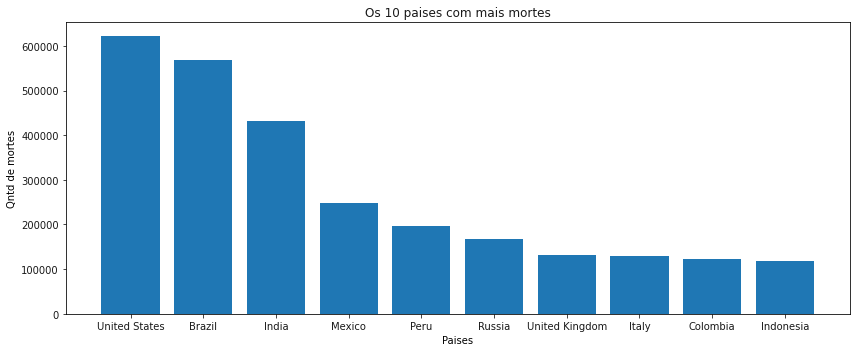

In [64]:
# ax.bar('location', 'total_deaths', data=top5_total_deaths)
fig, ax = plt.subplots(figsize=(12,5))
ax.bar('location', 'total_deaths', data=top10_total_deaths)
ax.set_title("Os 10 paises com mais mortes")
ax.set_xlabel("Paises")
ax.set_ylabel("Qntd de mortes")

plt.tight_layout()

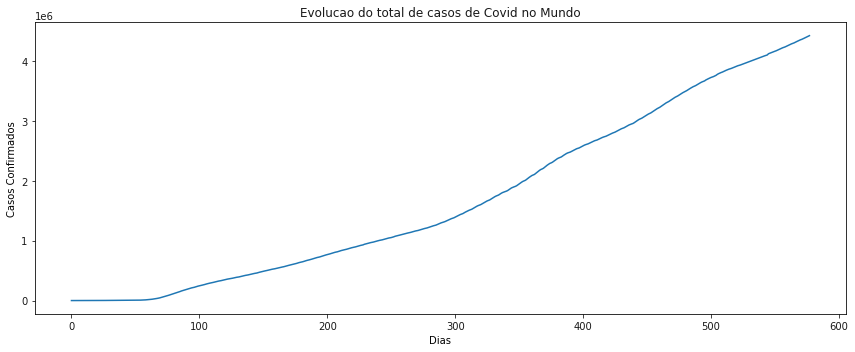

In [65]:
fig, ax = plt.subplots(figsize=(12,5))

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
ax.set_title("Evolucao do total de casos de Covid no Mundo")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Dias")

plt.tight_layout()

In [66]:
!pip install bar_chart_race -q

In [67]:
import bar_chart_race as bcr

df_countries = df.loc[df.continent.isnull()==False, ['location', 'date', 'new_deaths']].copy()

In [68]:
df_countries_top_10 = df_countries[df_countries['location'].isin(countries)]

In [69]:
df_countries.head()

,location,date,new_deaths
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN


In [70]:
df_countries_top_10['new_deaths'] = df_countries_top_10['new_deaths'].fillna(0)
# df_countries['total_cases'] = df_countries['total_cases'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_countries_top_10.head()

,location,date,new_deaths
14084,Brazil,2020-02-26,0.0
14085,Brazil,2020-02-27,0.0
14086,Brazil,2020-02-28,0.0
14087,Brazil,2020-02-29,0.0
14088,Brazil,2020-03-01,0.0


In [72]:
df_pivot = df_countries_top_10.pivot_table(values='new_deaths', index='date', columns='location', fill_value=0).copy()
df_pivot

location,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
date,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-08-17,1106,108,440,1180,54,877,146,785,170,1001
2021-08-18,1064,93,530,1128,69,940,120,779,111,1146
2021-08-19,979,120,540,1492,55,836,57,768,114,908


In [73]:
# df_pivot['date'] = df.index
df_pivot.reset_index(level=0, inplace=True)

In [74]:
df_pivot

location,date,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
0,2020-01-01,0,0,0,0,0,0,0,0,0,0
1,2020-01-02,0,0,0,0,0,0,0,0,0,0
2,2020-01-03,0,0,0,0,0,0,0,0,0,0
3,2020-01-04,0,0,0,0,0,0,0,0,0,0
4,2020-01-05,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
594,2021-08-17,1106,108,440,1180,54,877,146,785,170,1001
595,2021-08-18,1064,93,530,1128,69,940,120,779,111,1146
596,2021-08-19,979,120,540,1492,55,836,57,768,114,908
597,2021-08-20,870,122,375,1348,49,775,36,764,114,2677


In [75]:
df_pivot.dtypes


location
date              datetime64[ns]
Brazil                     int64
Colombia                   int64
India                      int64
Indonesia                  int64
Italy                      int64
Mexico                     int64
Peru                       int64
Russia                     int64
United Kingdom             int64
United States              int64
dtype: object

In [76]:
df_pivot.reset_index(drop=True, inplace=True)

In [77]:
df_pivot_monthly = df_pivot.groupby(pd.Grouper(key='date', freq='1M')).sum().cumsum(axis = 0)

In [78]:
df_pivot_monthly

location,Brazil,Colombia,India,Indonesia,Italy,Mexico,Peru,Russia,United Kingdom,United States
date,,,,,,,,,,
2020-01-31,0,0,0,0,0,0,0,0,0,0
2020-02-29,0,0,0,0,29,0,0,0,0,1
2020-03-31,201,16,35,136,12428,29,138,17,2457,5362
2020-04-30,6006,293,1154,792,27967,1859,4782,1073,26754,66187
2020-05-31,29314,939,5408,1613,33415,9930,20710,4693,37527,107732
2020-06-30,59594,3334,17400,2876,34767,27769,37898,9306,40479,127469
2020-07-31,92475,10105,36511,5131,35141,46688,55982,13939,41274,153987
2020-08-31,121381,19662,65288,7417,35483,64414,73612,17128,41589,183614
2020-09-30,143952,25998,98678,10740,35894,77646,82135,20630,42233,207013


In [79]:
bcr.bar_chart_race(
    df=df_pivot_monthly, 
    filename=None,
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total de mortes: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    perpendicular_bar_func='mean', # função da barra perpendicular
    period_length=1000,# tamanho do período
    figsize=(5, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='Top 10 Paises mortes por Covid', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False) 

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [80]:
df_brasil = df.loc[df.location == "Brazil"].copy()

In [81]:
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
14084,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14085,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14086,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN
14087,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,9.91
14088,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN


In [82]:
# df_brasil[df_brasil["new_deaths"] != np.nan].head()
df_brasil[["date", "new_deaths"]].loc[df_brasil.new_deaths.first_valid_index()]

date          2020-03-17 00:00:00
new_deaths                      1
Name: 14104, dtype: object

In [83]:
df_brasil.fillna(0, inplace=True)
df_brasil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
14622,BRA,South America,Brazil,2021-08-17,20416183.0,37613.0,29077.286,570598.0,1106.0,832.143,96049.303,176.953,136.796,2684.417,5.203,3.915,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,169753003.0,122541955.0,51771235.0,0.0,1595443.0,2045834.0,79.86,57.65,24.36,0.0,9625.0,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0
14623,BRA,South America,Brazil,2021-08-18,20457897.0,41714.0,30401.714,571662.0,1064.0,844.857,96245.549,196.246,143.027,2689.422,5.006,3.975,0.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,171741149.0,123678883.0,52629848.0,0.0,1988146.0,2009722.0,80.80,58.19,24.76,0.0,9455.0,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0
14624,BRA,South America,Brazil,2021-08-19,20494212.0,36315.0,29877.857,572641.0,979.0,820.714,96416.395,170.846,140.562,2694.028,4.606,3.861,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,173650317.0,124755667.0,53240329.0,0.0,1909168.0,2007246.0,81.69,58.69,25.05,0.0,9443.0,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0
14625,BRA,South America,Brazil,2021-08-20,20528099.0,33887.0,29871.286,573511.0,870.0,807.000,96575.819,159.424,140.531,2698.121,4.093,3.797,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0
14626,BRA,South America,Brazil,2021-08-21,20556487.0,28388.0,29477.857,574209.0,698.0,774.429,96709.372,133.553,138.681,2701.405,3.284,3.643,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.2,75.88,0.765,0.0


In [84]:

df_brasil.set_index('date', inplace=True, drop=True)


In [85]:
idx = pd.Index(df_brasil.index)
print(idx.min())
print(idx.max())

2020-02-26 00:00:00
2021-08-21 00:00:00


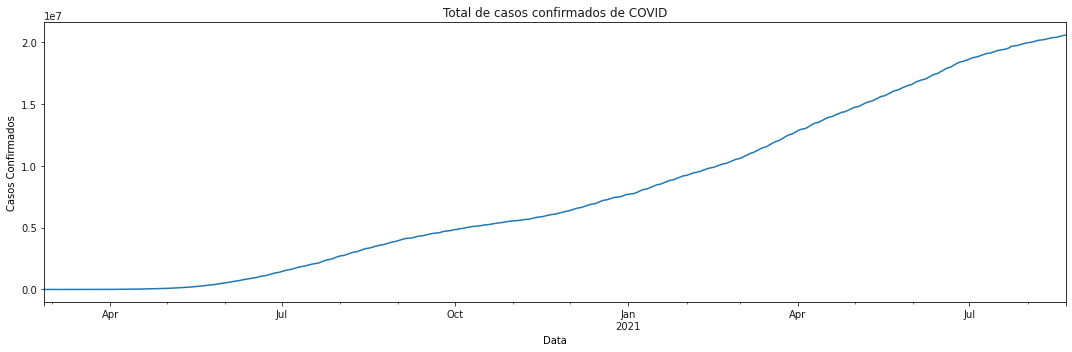

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"total_cases"].plot(kind="line", ax=ax)
ax.set_title("Total de casos confirmados de COVID")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

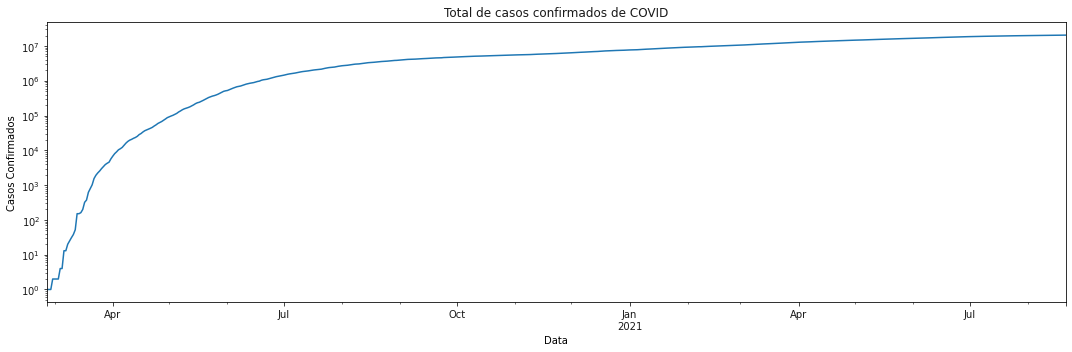

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"total_cases"].plot(kind="line", ax=ax)
ax.set_title("Total de casos confirmados de COVID")
ax.set_yscale("log")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

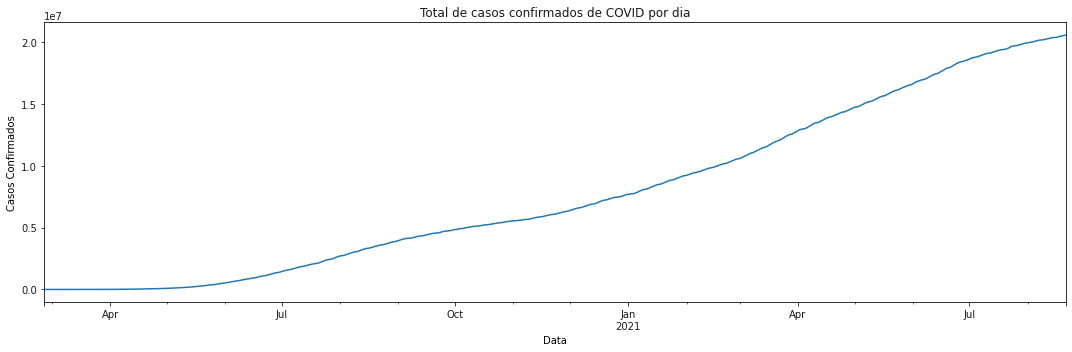

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"total_cases"].plot(kind="line", ax=ax)
ax.set_title("Total de casos confirmados de COVID por dia")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

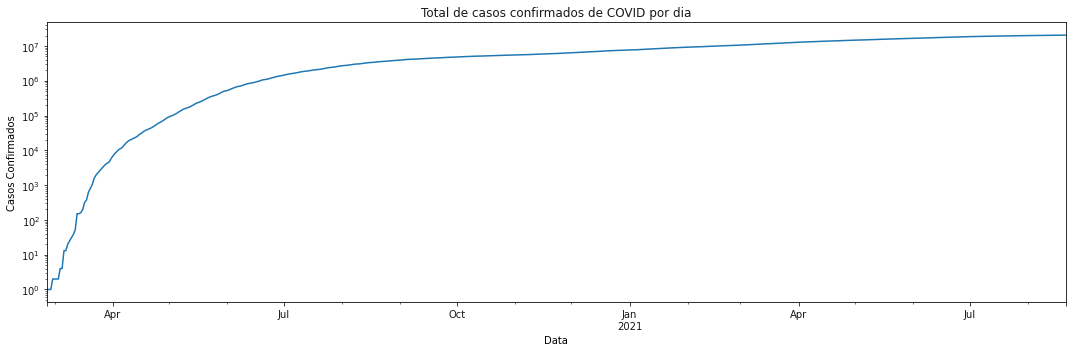

In [89]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"total_cases"].plot(kind="line", ax=ax)
ax.set_title("Total de casos confirmados de COVID por dia")
ax.set_yscale("log")
ax.set_ylabel("Casos Confirmados")
ax.set_xlabel("Data")

plt.tight_layout()

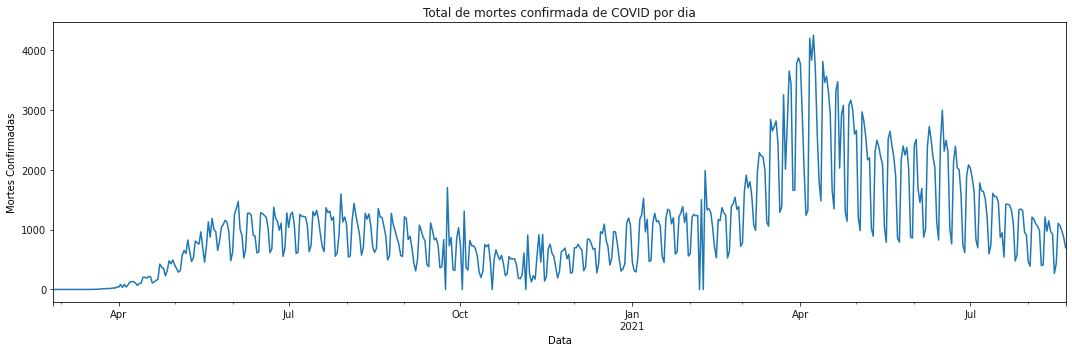

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"new_deaths"].plot(kind="line", ax=ax)
ax.set_title("Total de mortes confirmada de COVID por dia")
ax.set_ylabel("Mortes Confirmadas")
ax.set_xlabel("Data")

plt.tight_layout()

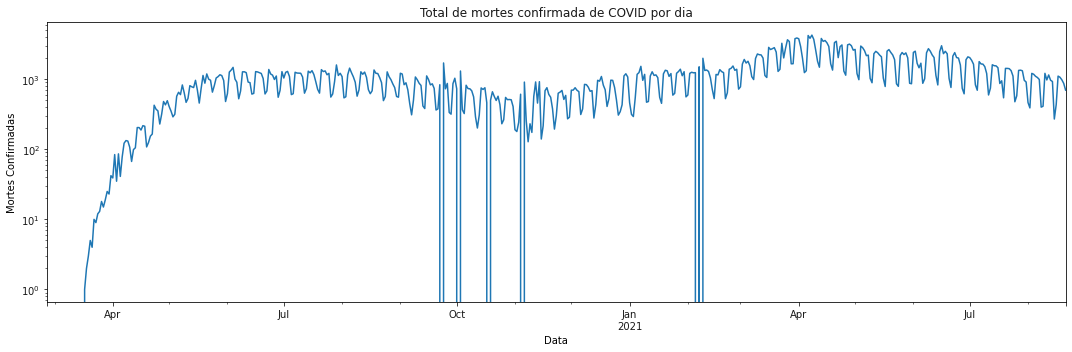

In [91]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"new_deaths"].plot(kind="line", ax=ax)
ax.set_title("Total de mortes confirmada de COVID por dia")
ax.set_yscale("log")
ax.set_ylabel("Mortes Confirmadas")
ax.set_xlabel("Data")

plt.tight_layout()

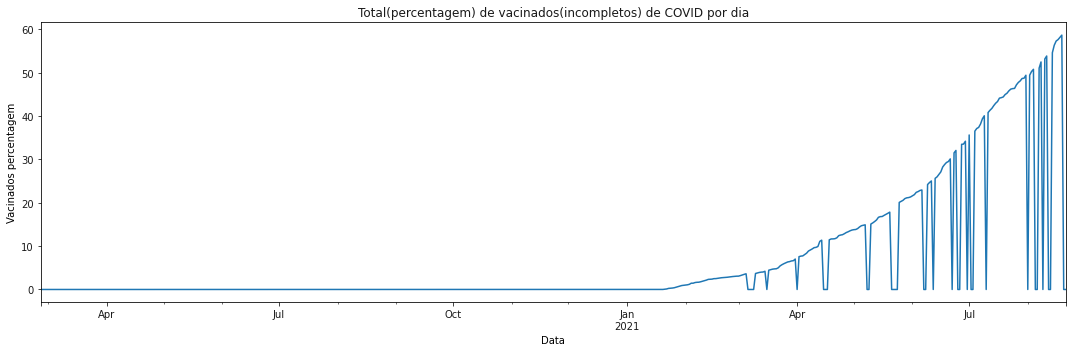

In [92]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"people_vaccinated_per_hundred"].plot(kind="line", ax=ax)
ax.set_title("Total(percentagem) de vacinados(incompletos) de COVID por dia")
ax.set_ylabel("Vacinados percentagem")
ax.set_xlabel("Data")

plt.tight_layout()

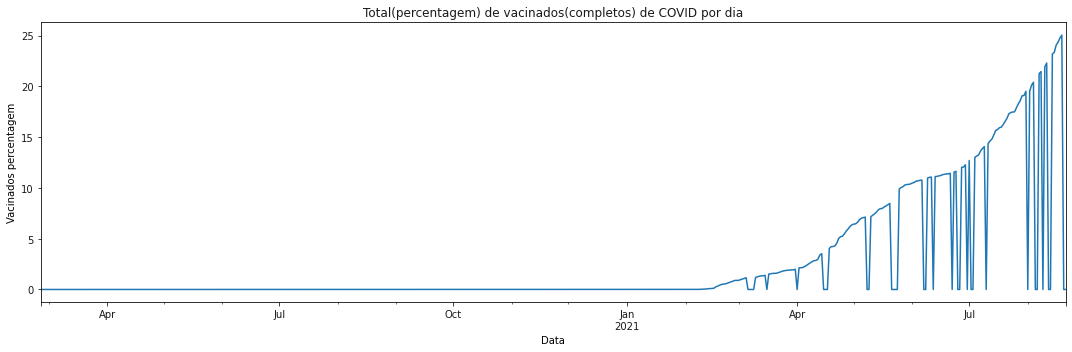

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))

df_brasil.loc[idx.min():idx.max(),"people_fully_vaccinated_per_hundred"].plot(kind="line", ax=ax)
ax.set_title("Total(percentagem) de vacinados(completos) de COVID por dia")
ax.set_ylabel("Vacinados percentagem")
ax.set_xlabel("Data")

plt.tight_layout()